---
title: Interpreting test results
authors:
- name: Aarya Patil
  affiliation: mpia
affiliations:
    - id: mpia
      institution: Max Planck Institute for Astronomy, Königstuhl 17, 69117 Heidelberg, Germany 
      ror: https://ror.org/01vhnrs90
      isni: 0000 0004 0491 677X
      department: Data Science Department
      address: Königstuhl 17
      city: Heidelberg
      country: Germany
      postal_code: 69117
date: 2024-03-26
---

Apply Bayes theorem to infer COVID probability given test result

In [37]:
# import matplotlib and define our alias
from matplotlib import pyplot as plt

# numpy
import numpy as np

In [38]:
# Define posterior function
def post(p_d_m, p_d_nm, p_m):
    """
    Posterior P(M | D) calculation given
    P(D | M), P(D | M'),  P(M).
    """
    p_nm = 1 - p_m
    oddsr = (p_d_m * p_m)/ (p_d_nm * p_nm)
    p_m_d = 1/(1 + 1/oddsr)
    return p_m_d, oddsr

In [39]:
# Vary reliability of test P(D | M)
# probability of true positive
p_d_m = np.linspace(0.01, 1, 100)
# probability of false positive
p_d_nm = 0.070
# prior probability of m
p_m = 0.008

# Calculate posterior
p_m_d, oddsr = post(p_d_m, p_d_nm, p_m)

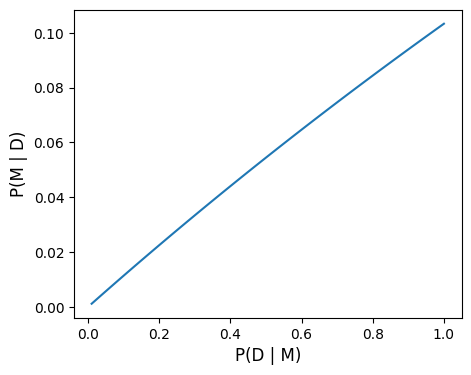

In [40]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(p_d_m, p_m_d)
ax.set_xlabel('P(D | M)', fontsize=12)
ax.set_ylabel('P(M | D)', fontsize=12)
plt.show()

In [34]:
# Vary false positive probabtlity
# probability of true positive
p_d_m = 0.9
# probability of false positive
p_d_nm = 10**np.linspace(-4, 0, 100)
# prior probability of m
p_m = 0.008

# Calculate posterior
p_m_d, oddsr = post(p_d_m, p_d_nm, p_m)

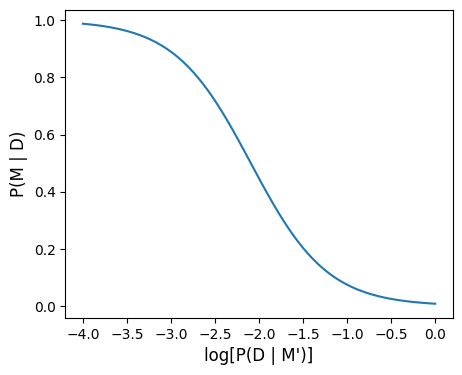

In [35]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(np.log10(p_d_nm), p_m_d)
ax.set_xlabel('log[P(D | M\')]', fontsize=12)
ax.set_ylabel('P(M | D)', fontsize=12)
plt.show()